In [2]:
import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
import time
import operator
import os
from sklearn.cross_validation import train_test_split
from random import shuffle
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.optimize import minimize
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import StratifiedKFold
import tqdm
from datetime import datetime
from datetime import time
from datetime import timedelta
%matplotlib inline



from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.optimize import minimize
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, make_scorer, roc_curve, auc
from sklearn.model_selection import train_test_split



#PLOT CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import itertools
import pickle
#matrix inverse
from numpy.linalg import inv
import jj_basic_fn as JJ
from hyperparams import Hyperparams as hp
from patient import patient
import prep
import plot_funcs
import modules

#default size of the graph
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

%load_ext autoreload
%autoreload 2

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', -1)

n_classifier = 7

col_rs = hp.col_rs
col_es = hp.col_es
col_le = hp.col_le
random_state = 42


/Users/hp/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/hp/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:

label = '_90_nd'
p231 = pickle.load(open(hp.prepath_pat + '231_trained' + label + '.p', "rb" ))
p222_1 = pickle.load(open(hp.prepath_pat + '222_1_trained' + label + '.p', "rb" ))
p222_2 = pickle.load(open(hp.prepath_pat + '222_2_trained' + label + '.p', "rb" ))
p241 = pickle.load(open(hp.prepath_pat + '241_trained' + label + '.p', "rb" ))
def cal_epoch_time(pat,epoch):
    start = pat.epoch_info['start']
    end = pat.epoch_info['end']
    num_per_epoch = pat.epoch_info['num_per_epoch']
    print(start + timedelta(days = (epoch-1) * num_per_epoch))
    print(start + timedelta(days = epoch * num_per_epoch))

cal_epoch_time(p231,10)

2017-11-13 00:00:00
2017-12-14 00:00:00


231
good:  537
bad:  356
total:  893


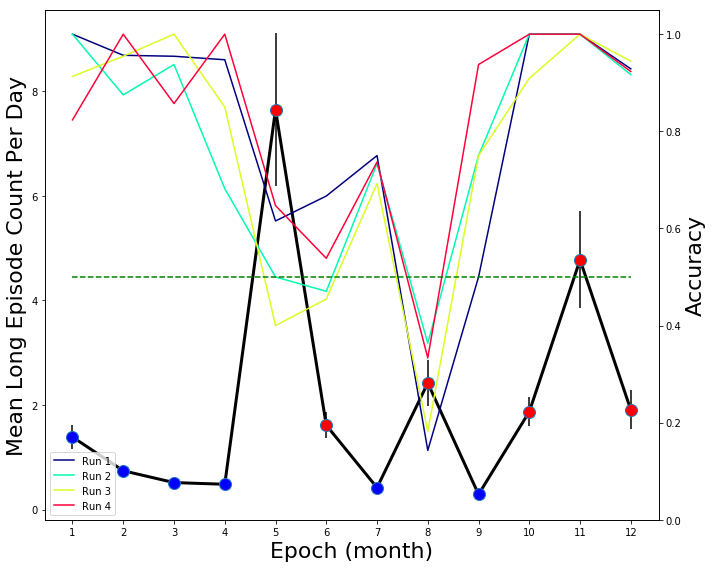

222_1
good:  276
bad:  452
total:  728


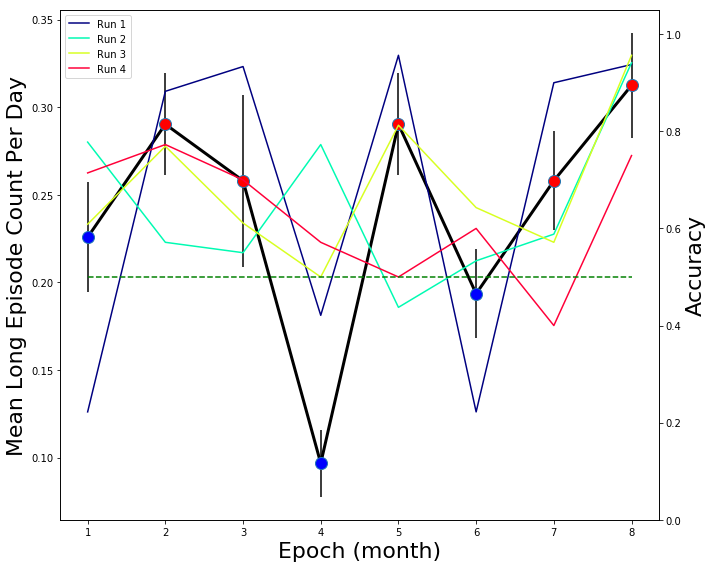

222_2
good:  265
bad:  359
total:  624


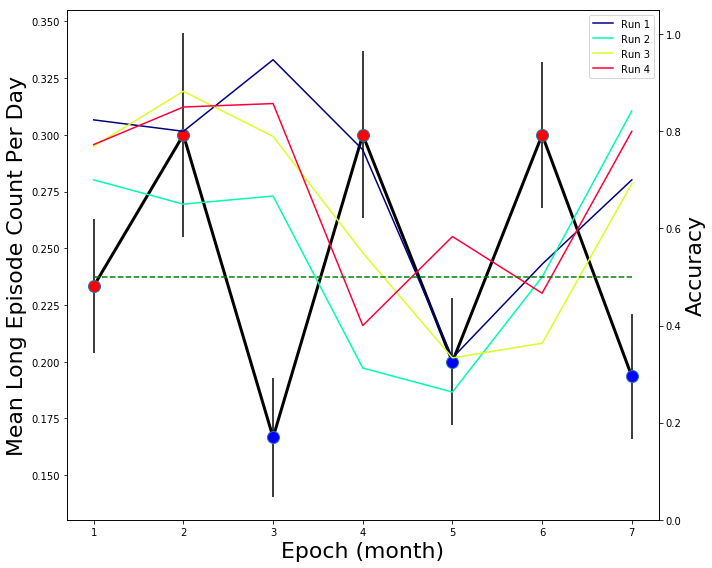

241
good:  281
bad:  288
total:  569


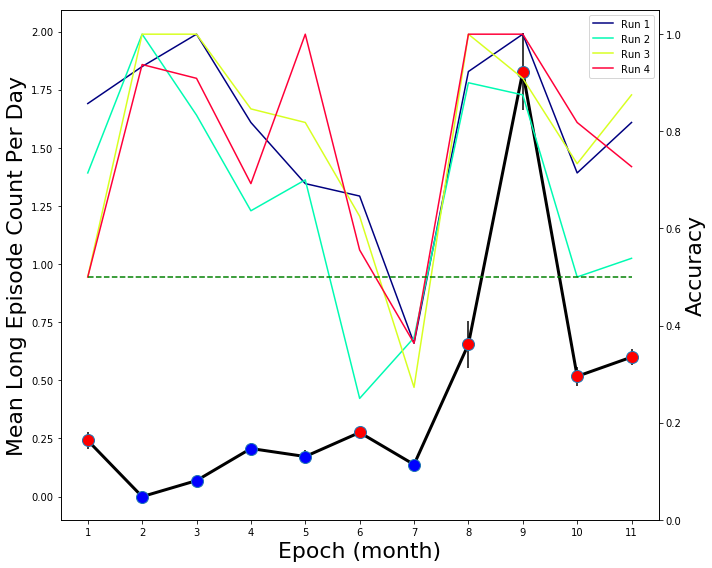

In [18]:
label_list = ['_90_nd','_rs11','_rs77','_rs93']
pat_id_list = ['231','222_1','222_2','241']
legend_list = ['seed = 42', 'seed = 11', 'seed = 77', 'seed = 93']
random_states = [42,11,77,93]
for patid in pat_id_list:
    pats = []
    for label in label_list:
        pat = pickle.load(open(hp.prepath_pat + patid + '_trained' + label + '.p', "rb" ))
        pats.append(pat)
    plot_funcs.plot_epoch_mean_acc(pats, legend_list = legend_list, random_states = random_states, if_save = 1, if_title = 0)

In [85]:
def scores_pat_estimators(pats,if_save = 0, label = None):
    int2name = hp.int2name
    n_estimator = hp.num_classifier
    auc_dict = {}
    acc_dict = {}
    estimators = [1,2,5,6,7]
    best_auc = 0
    for i in estimators:
        scores = []
        for pat in pats:
            X_test, y_test = pat.X_test, pat.y_test
            y_score, accuracy,_ , name = JJ.load_score(i, X_test, y_test, pat)
            fpr, tpr, _ = roc_curve(y_test, y_score)
            roc_auc = auc(fpr, tpr)
            #auc = pickle.load(open(prepath + 'Best_score_for_' + str(name) + '.p', "rb" ))
            scores.append(roc_auc)
        mean = np.mean(scores)
        std = np.std(scores)
        auc_dict[name] = scores + [mean,std]
        #acc_dict[name] = accuracy
    df = pd.DataFrame.from_dict(auc_dict,orient='index', columns = labels + ['mean', 'std'])
    sorted_df = df.sort_values(by = ['std'])
    display(sorted_df)
        #plot_funcs.render_mpl_table(pd.DataFrame(sorted_acc_dict, columns = ['Classifier', 'Accuracy']), pat,label = label)


In [86]:
labels = ['_90_nd', '_rs77', '_rs11', '_rs93']
pat_ids = ['231','222_1', '222_2','241']
for pat_id in pat_ids:
    print('Patient, ', pat_id)
    pats = []
    for label in labels:
        pat = pickle.load(open(hp.prepath_pat + pat_id + '_trained' + label + '.p', "rb" ))
        pats.append(pat)

    scores_pat_estimators(pats)

Patient,  231


,_90_nd,_rs77,_rs11,_rs93,mean,std
SVM,0.833725,0.823683,0.826943,0.828769,0.828280,0.003633
gradient boosting,0.883151,0.850417,0.831899,0.842593,0.852015,0.019140
random forest,0.878717,0.829421,0.830725,0.850417,0.847320,0.019944
Logistic Regression,0.854721,0.795644,0.816119,0.842071,0.827139,0.022897
decision tree,0.841680,0.762324,0.795970,0.798644,0.799654,0.028170


Patient,  222_1


,_90_nd,_rs77,_rs11,_rs93,mean,std
decision tree,0.588112,0.596903,0.596404,0.635564,0.604246,0.018416
random forest,0.714286,0.662937,0.674925,0.672328,0.681119,0.019661
SVM,0.730470,0.639760,0.687912,0.691908,0.687512,0.032191
gradient boosting,0.731269,0.606793,0.625375,0.672727,0.659041,0.048134
Logistic Regression,0.730669,0.562637,0.733666,0.660340,0.671828,0.069536


Patient,  222_2


,_90_nd,_rs77,_rs11,_rs93,mean,std
decision tree,0.690907,0.613077,0.593160,0.650419,0.636891,0.037350
gradient boosting,0.656971,0.658019,0.566300,0.672956,0.638561,0.042197
SVM,0.653826,0.682652,0.592505,0.710692,0.659919,0.043808
random forest,0.699686,0.664308,0.589361,0.697589,0.662736,0.044627
Logistic Regression,0.697589,0.670860,0.598270,0.766247,0.683242,0.060144


Patient,  241


,_90_nd,_rs77,_rs11,_rs93,mean,std
gradient boosting,0.814655,0.825123,0.716441,0.820813,0.794258,0.045081
decision tree,0.668103,0.701817,0.570197,0.649169,0.647321,0.048356
random forest,0.823276,0.838670,0.713362,0.821736,0.799261,0.050034
Logistic Regression,0.840209,0.841749,0.714594,0.832512,0.807266,0.053619
SVM,0.878695,0.898707,0.725985,0.838670,0.835514,0.066829


In [32]:
label = 
p231 = pickle.load(open(hp.prepath_pat + '231_trained' + label + '.p', "rb" ))
p222_1 = pickle.load(open(hp.prepath_pat + '222_1_trained' + label + '.p', "rb" ))
p222_2 = pickle.load(open(hp.prepath_pat + '222_2_trained' + label + '.p', "rb" ))
p241 = pickle.load(open(hp.prepath_pat + '241_trained' + label + '.p', "rb" ))
pats_11 = [p231, p222_1, p222_2, p241]


SyntaxError: invalid syntax (<ipython-input-32-eb04aaeac679>, line 1)

231
good:  537
bad:  356
total:  893


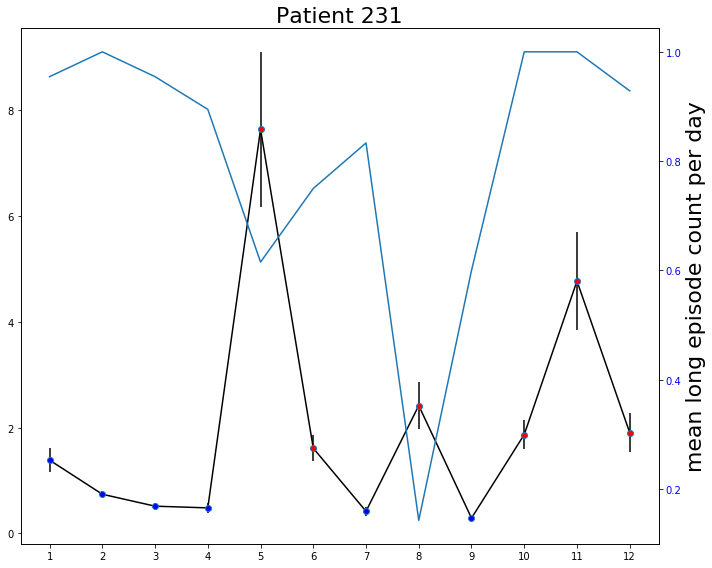

222_1
good:  276
bad:  452
total:  728


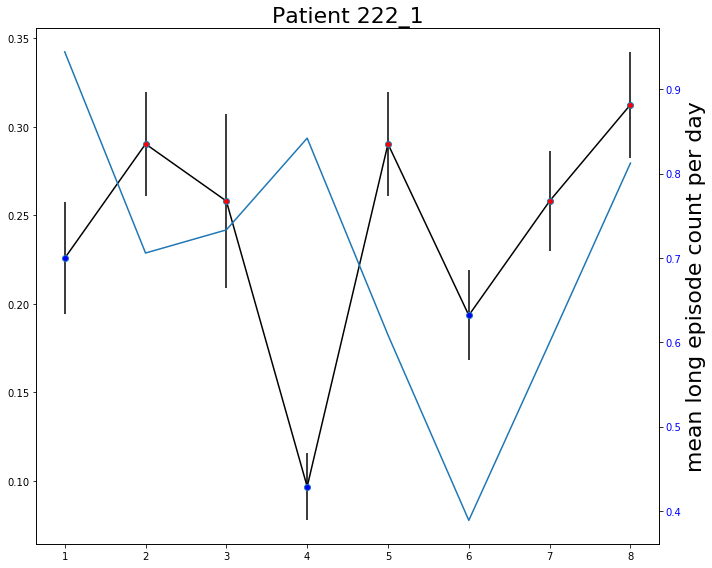

222_2
good:  265
bad:  359
total:  624


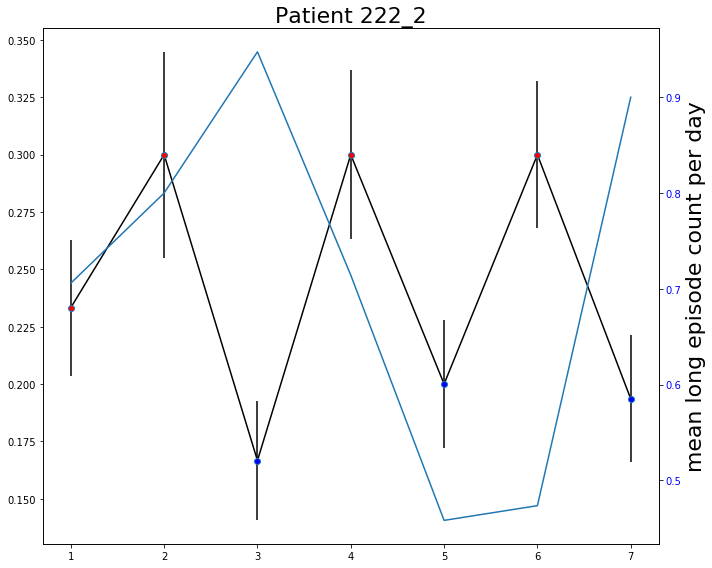

241
good:  281
bad:  288
total:  569


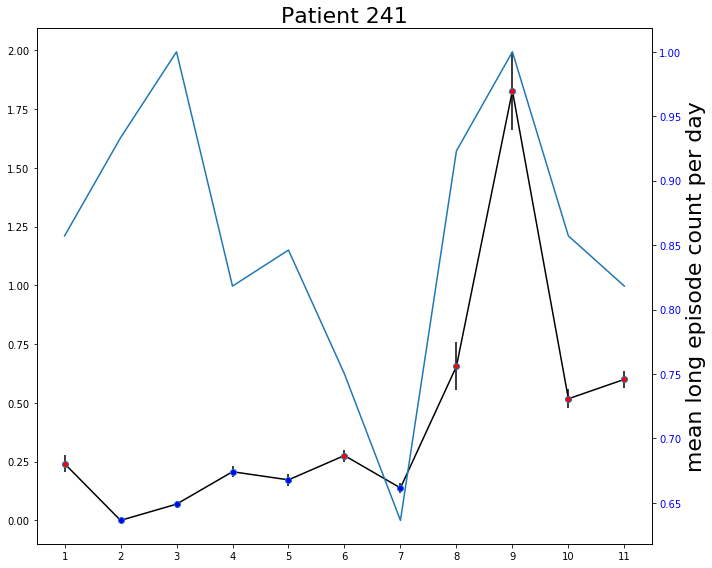

In [91]:
plot_funcs.plot_epoch_mean(pats_11, if_acc = 1)

231
good:  537
bad:  356
total:  893


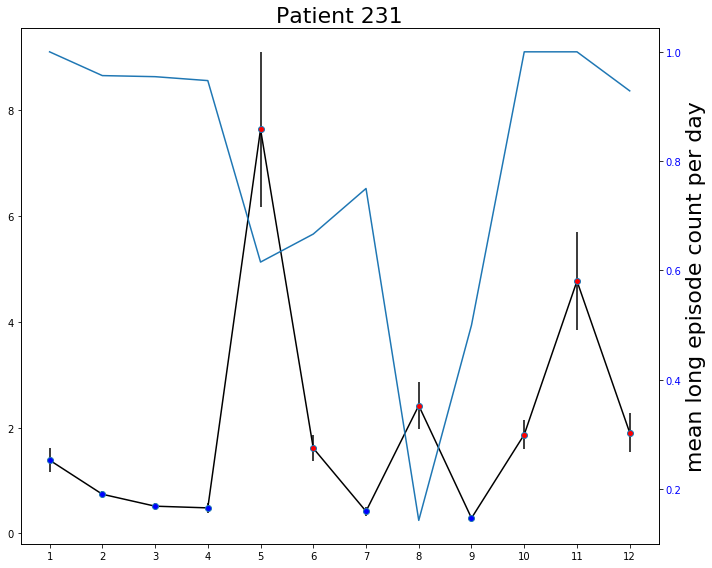

222_1
good:  276
bad:  452
total:  728


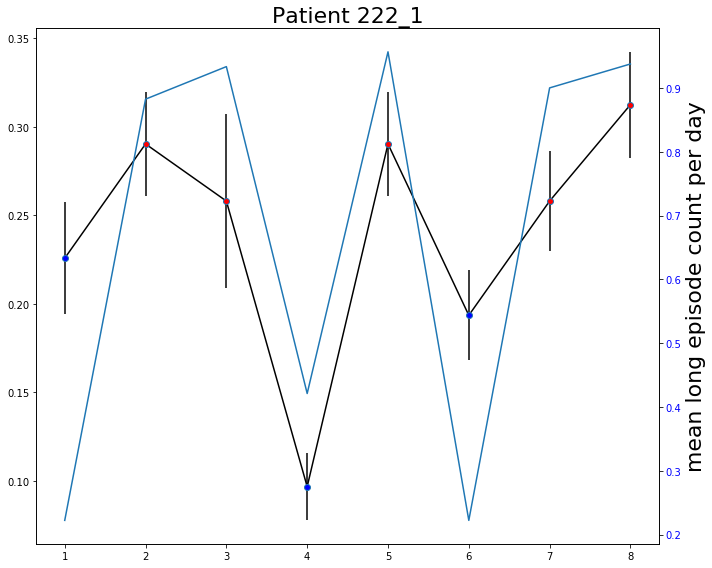

222_2
good:  265
bad:  359
total:  624


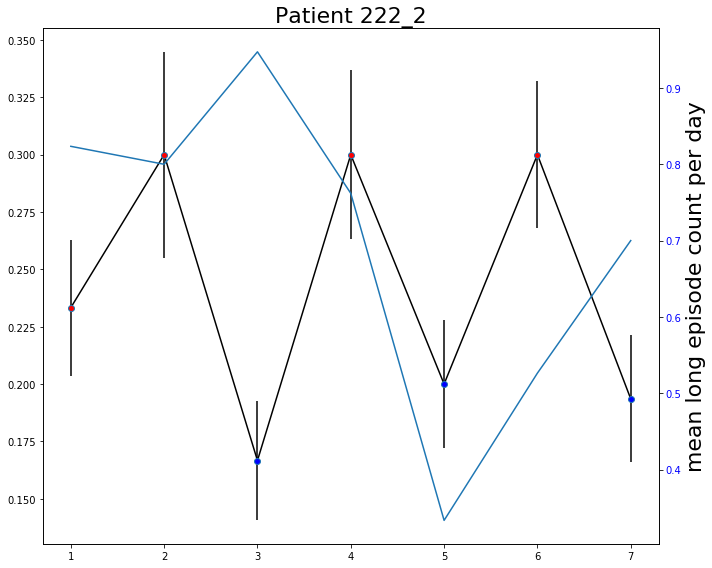

241
good:  281
bad:  288
total:  569


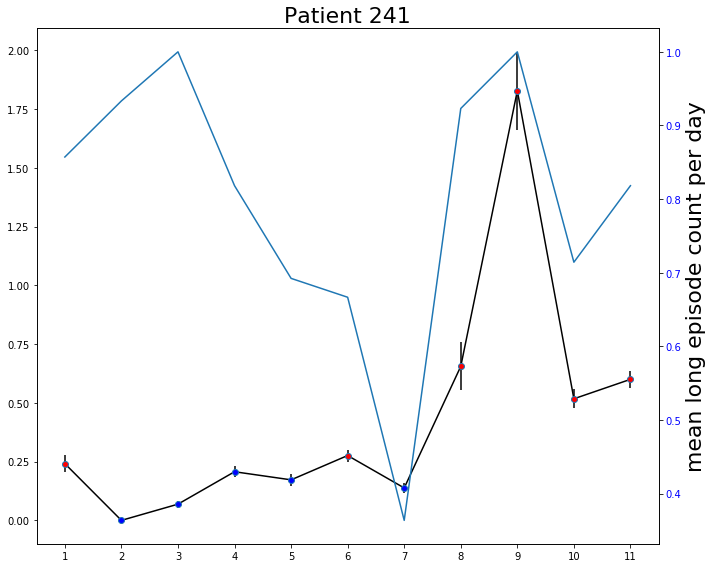

In [92]:
plot_funcs.plot_epoch_mean(pats, if_acc=1)


In [15]:
start_241 = datetime.strptime('Nov 14 2017', '%b %d %Y')
end_241 = datetime.strptime('Oct 4 2018', '%b %d %Y')
num_per_epoch_241 = 29

In [27]:
num_epochs

12

In [28]:
# [p241,p226] = modules.build_patients(-2, 90)
# pat_list = [p241,p226]
#p241 = modules.build_patients(241, 90)
#p231 = modules.build_patients(231, 90)
# p231, p222_1, p222_2, p229 = modules.build_patients(-1,90, if_weekly = 1)
# pat_list = [p231, p222_1, p222_2, p229]
# for pat in pat_list:
#     JJ.save_object(pat, '../patients/' + pat.id +'.p')
p231, p222_1, p222_2, p241 = modules.build_patients(-3,90)
pat_list = [p231, p222_1, p222_2, p241]

/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [48]:
num_all = np.array(list(pat.features.groupby('epoch')['filename'].count()))
num_test = np.array(list(X_test.groupby('epoch')['filename'].count()))
num_test/num_all

array([0.21052632, 0.19298246, 0.20689655, 0.20689655, 0.2       ,
       0.2       , 0.20754717, 0.20408163, 0.21052632, 0.19298246,
       0.19642857])

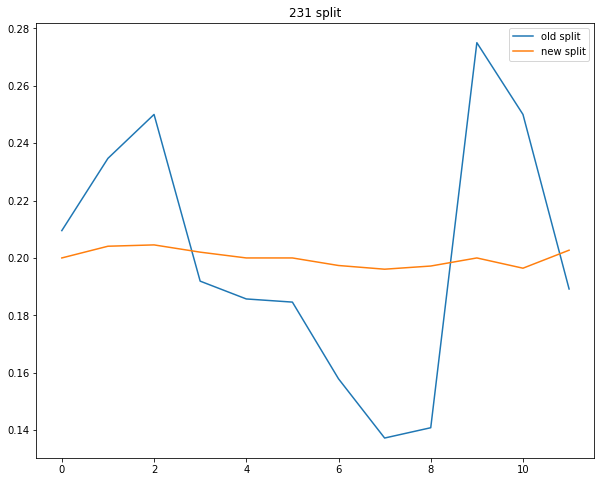

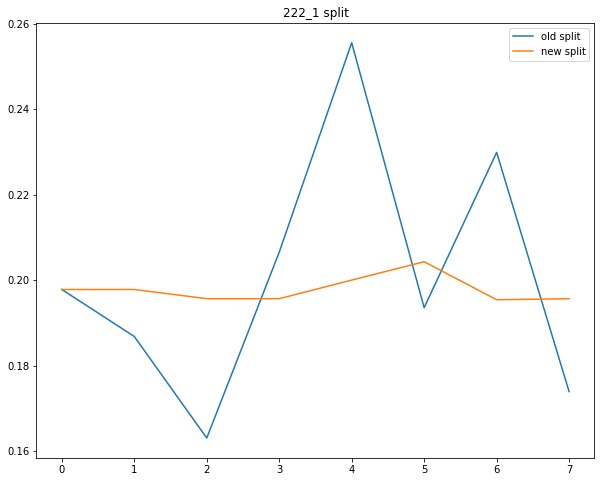

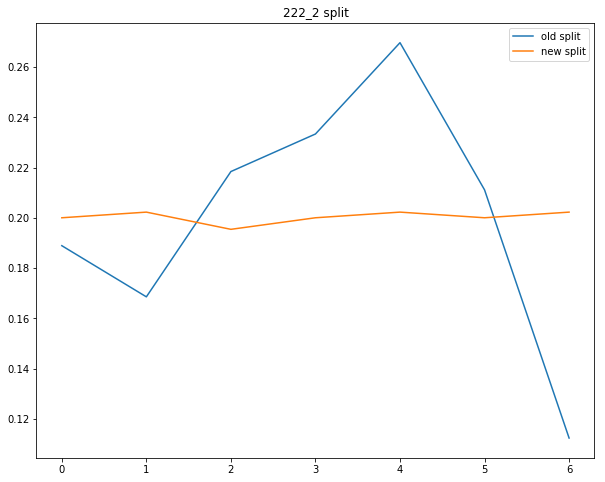

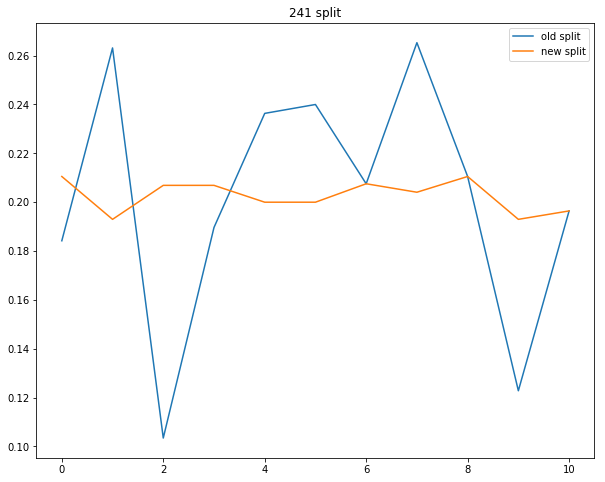

In [52]:
for pat in pat_list:
    num_all = np.array(list(pat.features.groupby('epoch')['filename'].count()))
    X_train, X_test, y_train, y_test = modules.get_ml_data(pat, if_split = -1)
    num_test = np.array(list(X_test.groupby('epoch')['filename'].count()))
    plt.plot(num_test/num_all, label = 'old split')
    X_train, X_test, y_train, y_test = modules.get_ml_data(pat, if_split = -2)
    num_test = np.array(list(X_test.groupby('epoch')['filename'].count()))
    plt.plot(num_test/num_all, label = 'new split')
    plt.title(pat.id + ' split')
    plt.legend()
    plt.show()    

In [26]:
X_test

,filename,region_start_time,long_epi,sleep,delta1,delta2,delta3,delta4,theta1,theta2,theta3,theta4,alpha1,alpha2,alpha3,alpha4,beta1,beta2,beta3,beta4,lowgamma1,lowgamma2,lowgamma3,lowgamma4,highgamma1,highgamma2,highgamma3,highgamma4,all1,all2,all3,all4,i12,i34,epoch,label,id,if_stimulated
1382,1.312503e+17,2016-11-30 14:54:19.000022400,0.0,0.0,55.442401,166.718065,41.607668,89.415658,133.171901,358.465803,102.972159,236.751074,40.140638,150.483014,100.146668,172.207340,43.025706,168.537063,107.632499,218.808792,14.382904,98.946030,65.238420,107.941227,9.492269,27.749090,23.685630,35.977657,294.073607,969.344983,440.386314,858.443110,0.0,0.0,1,False,222_2,False
1687,1.313392e+17,2017-03-13 16:58:03.000028800,0.0,0.0,52.202044,151.618125,36.895988,71.835383,170.665099,316.926318,69.074458,184.861921,39.873729,153.584048,79.238069,152.199727,62.479202,178.726010,130.970161,216.006518,15.188533,90.059601,75.492003,89.587354,10.674327,25.035549,30.724681,31.403811,351.570580,916.924281,421.227060,750.810537,0.0,0.0,4,True,222_2,False
1859,1.313894e+17,2017-05-10 03:59:01.999968000,0.0,1.0,55.083269,138.152395,80.151482,160.392145,59.403131,174.098917,180.777105,335.343622,49.696085,131.763230,144.056544,184.434766,44.199023,171.537940,142.943396,160.136965,12.819581,68.979770,35.470378,49.051578,8.946198,18.740475,19.135446,20.763874,226.735121,700.117960,601.126747,905.968162,0.0,0.0,6,True,222_2,False
1334,1.312365e+17,2016-11-14 14:56:53.999980800,0.0,0.0,46.921248,170.008185,28.972537,84.610563,107.038072,356.884020,88.313024,193.908213,31.742252,133.698508,78.532454,188.511878,42.270351,160.686759,106.975448,218.018741,13.125022,97.564151,62.627265,96.528853,9.438152,27.628454,21.621531,33.329026,250.163850,943.989817,386.419389,812.142833,0.0,0.0,0,False,222_2,False
1643,1.313272e+17,2017-02-26 20:47:12.999984000,0.0,0.0,34.036687,119.092198,22.959897,52.701527,55.367902,296.623211,73.406263,193.451173,30.849907,135.246800,80.646502,167.657938,54.463082,157.075156,188.928527,215.931729,12.859548,95.763065,74.489697,98.707678,9.508510,26.448851,21.665985,34.190852,196.243800,828.087187,461.676379,760.886925,0.0,0.0,4,True,222_2,False
1564,1.313039e+17,2017-01-31 15:51:26.000035200,0.0,0.0,58.030722,134.684099,25.961817,76.936000,112.277508,379.318143,85.429906,199.491250,39.101117,101.397227,96.109014,202.412621,47.706718,147.380853,184.065643,212.448345,13.449871,75.349319,61.822398,96.903901,9.507000,24.077624,20.266654,32.076668,278.952411,858.411522,472.844519,818.227215,0.0,0.0,3,False,222_2,False
1445,1.312693e+17,2016-12-21 20:58:08.000025600,0.0,0.0,32.301529,96.107305,19.768314,109.554655,53.676627,212.548272,210.472927,219.692287,25.477841,99.124717,121.092112,131.827711,41.626138,140.898407,202.846514,165.723187,12.772597,75.535872,37.899163,70.723211,9.170875,23.877924,13.485721,29.263292,174.490307,645.028991,604.766699,724.629044,0.0,0.0,1,False,222_2,False
1319,1.312321e+17,2016-11-09 14:57:47.999980800,0.0,0.0,50.502099,173.181610,42.628113,106.492271,131.684487,399.285643,81.201701,248.645016,35.436027,99.497745,59.363447,190.394916,48.551052,141.679643,113.088083,230.565568,14.422762,97.545412,81.342652,97.959029,9.677132,26.696331,34.194562,33.747065,289.654183,934.003372,410.301472,906.553874,0.0,0.0,0,False,222_2,False
1760,1.313608e+17,2017-04-07 04:53:56.999961600,0.0,1.0,85.882308,387.852578,115.460688,280.055881,101.378235,319.495000,192.537699,429.466930,83.952956,206.514512,96.217094,208.118268,77.711259,213.946157,148.526441,162.951555,13.308560,100.905092,67.866591,61.983064,9.529735,23.477387,32.684400,27.675872,370.094066,1241.156969,649.555052,1165.800059,0.0,1.0,5,False,222_2,False
1697,1.313428e+17,2017-03-17 04:57:26.000006400,0.0,1.0,61.815749,258.549102,77.423036,161.274288,76.200850,306.054055,143.594359,318.324912,46.727449,174.109161,104.755855,146.816473,48.666968,222.205035,144.976727,171.751232,12.986224,109.406906,56.654421,75.818270,9.326854,27.201989,28.944067,28.252794,254.31557

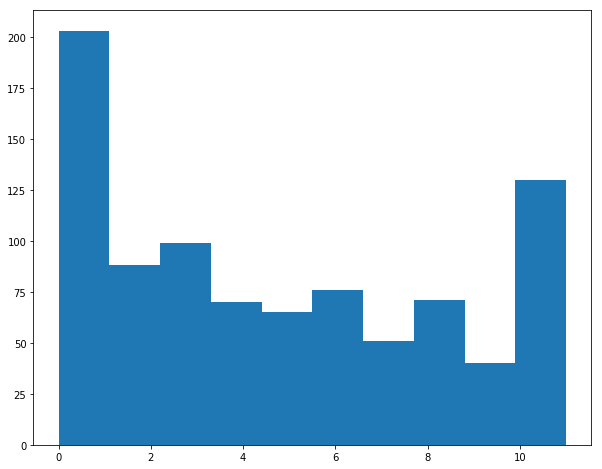

In [118]:
label = '_w'

p231 = pickle.load(open(hp.prepath_pat + '231_trained' + label + '.p', "rb" ))
p222_1 = pickle.load(open(hp.prepath_pat + '222_1_trained' + label + '.p', "rb" ))
p222_2 = pickle.load(open(hp.prepath_pat + '222_2_trained' + label + '.p', "rb" ))
p241 = pickle.load(open(hp.prepath_pat + '241_trained' + label + '.p', "rb" ))
pats = [p231, p222_1, p222_2, p241]

# for pat in pats:
#     print('Patient ', pat.id)
#     X_train, X_test, y_train, y_test = pat.X_train, pat.X_test, pat.y_train, pat.y_test
#     JJ.scores_estimators(X_test, y_test, pat= pat, if_save = 0)
#     plot_funcs.plot_roc_all(X_test, y_test, pat =pat, if_save = 0)

In [125]:
p231.X_train.shape

(722, 24)

In [114]:
X_train, X_test, y_train, y_test = modules.get_ml_data(p231, split = -1)

(714, 38)
(179, 38)
(893, 38)


In [112]:
X_test = X.groupby('epoch', group_keys=False).apply(lambda x: x.sample(frac = 0.2, random_state = random_state))
train_idx = [a for a in list(X.index) if a not in list(X_test.index)]
X_train = X.loc[train_idx]
print(X_train.shape)
print(X_test.shape)
print(X.shape)


y_train = X_train.loc[:,'label']
y_test = X_test.loc[:,'label']

drop_list = ['label', 'region_start_time', 'epoch', 'if_stimulated', 'filename', 'id',]
if if_remove_delta:
    drop_list += ['delta1',  'delta2',  'delta3', 'delta4']
if if_remove_icd:
    drop_list.append('i12')
    drop_list.append('i34')
if if_remove_sleep:
    if 'sleep' in dat.columns:
        drop_list.append('sleep')
if if_remove_le:
    if 'long_epi' in dat.columns:
        drop_list.append('long_epi')
X_train = np.array(X_train.drop(drop_list, axis = 1, inplace = False))
X_test = np.array(X_test.drop(drop_list, axis = 1, inplace = False))

print(X_train)
y=y.astype('int')

if if_scaler:
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)    

(714, 38)
(179, 38)
(893, 38)
[[ 83.02585486  49.76639023 101.68593566 ... 374.85167496 431.14456933
  200.21298543]
 [ 78.43353809  52.02397876 110.20305142 ... 386.78074496 504.75266929
  212.88359187]
 [111.81421911 114.2538049  110.93608164 ... 619.70509721 461.33567216
  202.95393524]
 ...
 [ 89.96687869  90.94038614  96.88758053 ... 512.57280887 468.42539585
  194.6346921 ]
 [225.67023784 264.01521266 207.82988984 ... 957.46209822 744.38448506
  552.02751012]
 [113.61508112  76.85967696 149.85058018 ... 450.54621368 534.26057606
  231.5109682 ]]


NameError: name 'scaler' is not defined

In [106]:
X

,theta1,theta2,theta3,theta4,alpha1,alpha2,alpha3,alpha4,beta1,beta2,beta3,beta4,lowgamma1,lowgamma2,lowgamma3,lowgamma4,highgamma1,highgamma2,highgamma3,highgamma4,all1,all2,all3,all4,epoch
647,77.653426,73.585284,132.283194,41.393056,76.774523,83.716009,73.781896,24.715429,158.709932,195.014768,132.185618,57.815951,66.921943,84.626163,59.516749,41.280686,17.842459,19.848230,17.768902,15.825719,449.080826,497.912560,583.423582,228.331494,0
648,83.025855,49.766390,101.685936,43.323707,52.038473,63.795443,55.284608,19.814494,135.766837,143.574827,103.785208,42.320166,66.032288,64.156730,52.980774,39.005670,18.193194,18.552144,19.051299,15.535918,420.025064,374.851675,431.144569,200.212985,0
649,78.433538,52.023979,110.203051,36.999955,64.644898,55.724151,58.688134,19.871226,181.487332,155.427435,121.713626,47.794228,72.383902,61.297536,63.108861,41.514227,20.093607,19.112256,21.323889,16.489723,514.946178,386.780745,504.752669,212.883592,0
650,111.814219,114.253805,110.936082,41.216232,105.378780,114.072113,62.648212,27.869914,187.564442,220.525742,115.320875,53.176903,67.959740,67.252669,51.975569,33.809532,18.470845,20.585696,17.197160,13.557635,619.553782,619.705097,461.335672,202.953935,0
651,79.233067,64.724569,102.978850,40.099788,50.436315,75.311729,57.604117,19.613029,152.275433,146.887291,119.058054,44.874632,58.494189,54.774480,51.623943,35.571129,17.948774,17.112005,18.905673,14.801637,449.277355,418.643967,507.236063,213.607815,0
652,94.976730,44.356892,127.877129,37.657951,60.909213,50.234004,56.588664,20.412051,175.384442,139.574490,129.467766,43.214728,72.943196,67.520685,59.434903,40.154272,19.055256,19.792319,21.209860,16.168228,538.850676,375.030443,544.170195,214.113030,0
653,89.035278,65.329579,116.948584,39.398970,53.993892,60.320291,59.247493,21.095735,164.874577,137.077698,124.463671,43.715393,72.642027,65.786504,58.806123,38.956958,19.665885,20.966004,21.826760,17.061921,488.830085,399.226190,526.187100,214.809479,0
654,95.763307,71.407570,122.993170,57.822330,67.209221,66.088375,63.251004,29.921334,166.247965,152.007860,113.562948,47.980650,64.437075,65.954881,50.772976,40.047462,18.549292,19.435048,18.441909,14.647193,493.822944,414.372099,487.273913,245.373050,0
655,305.556517,262.238440,397.426399,224.110307,138.953876,145.565883,211.420221,231.338610,177.562402,170.194289,253.711598,264.543956,50.122690,56.374755,64.771171,103.383557,18.156613,21.049244,17.841345,21.241607,1013.509263,908.738281,1280.147218,938.436500,0
656,98.074770,73.821734,160.924270,45.976279,56.985345,59.483602,57.492818,24.894696,152.543317,138.803821,114.986092,45.199388,59.410178,62.847114,48.996098,38.588562,17.512215,19.912663,17.567147,16.379624,455.327692,405.171813,540.379631,226.173082,0


In [82]:
sum(X_test.loc[:,'epoch'] == 2)

18

In [83]:
sum(X.loc[:,'epoch'] == 2)

88

In [97]:
X_train = X.loc[train_idx]
print(X_train.shape)
print(X_test.shape)
print(X.shape)


(714, 25)
(179, 25)
(893, 25)


In [51]:

df = pd.DataFrame(dict(
        A=[1, 1, 1, 2, 2, 2, 2, 3, 4, 4],
        B=range(10)
    ))

df.groupby('A', group_keys=False).apply(lambda x: x.sample(frac = 0.6, random_state = random_state))

,A,B
0,1,0
1,1,1
4,2,4
6,2,6
7,3,7
9,4,9


In [15]:
df

,A,B
0,1,0
1,1,1
2,1,2
3,2,3
4,2,4
5,2,5
6,2,6
7,3,7
8,4,8
9,4,9
